In [198]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
 
hr = pd.read_csv('House_Rent.csv')

hr.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [199]:
hr.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [200]:
hr.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [201]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [202]:
hr.shape

(4746, 12)

In [203]:
hr.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [204]:
hr.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [205]:
hr.drop(['Posted On',], axis=1, inplace=True)

<Axes: ylabel='Size'>

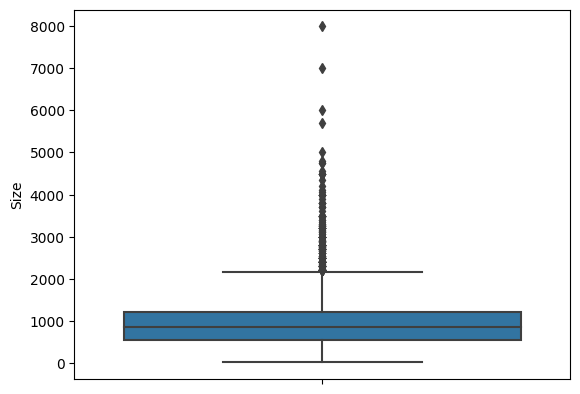

In [206]:
sns.boxplot(data=hr,y='Size')

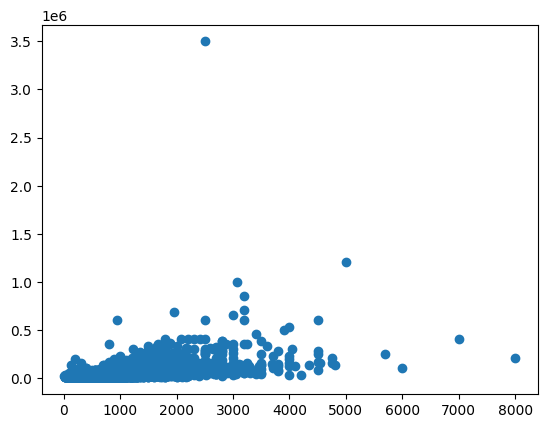

In [207]:
plt.scatter(hr['Size'],hr['Rent'])

<Axes: xlabel='City', ylabel='Rent'>

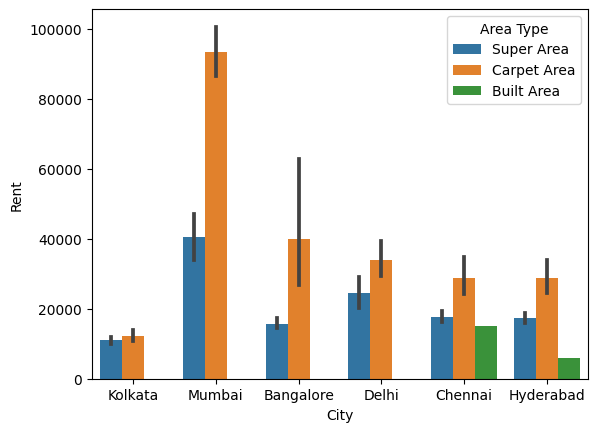

In [208]:
sns.barplot(data=hr,x='City',y='Rent',hue='Area Type')

<Axes: xlabel='Area Type', ylabel='Rent'>

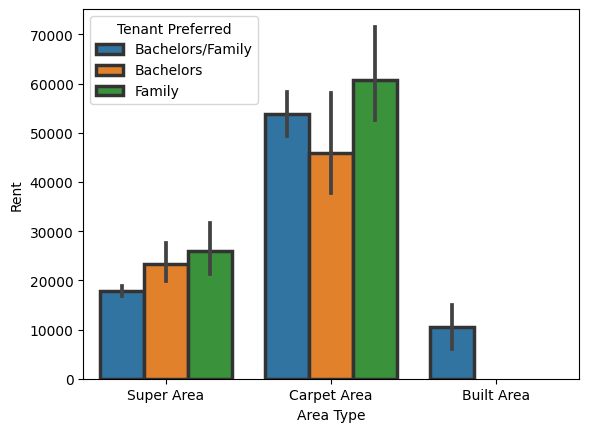

In [209]:
sns.barplot(data=hr,x='Area Type',y='Rent',hue='Tenant Preferred',linewidth=2.5,edgecolor=".2")

<Axes: xlabel='Point of Contact', ylabel='Rent'>

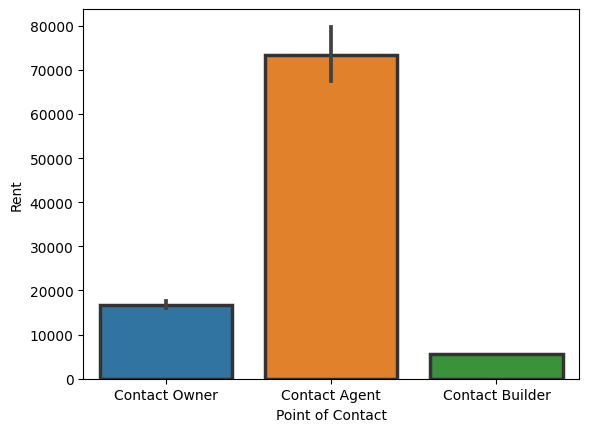

In [225]:
sns.barplot(data=hr,x='Point of Contact',y='Rent',linewidth=2.5,edgecolor=".2")    

In [211]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hr['Area Type'] = le.fit_transform(hr['Area Type'])
hr['Tenant Preferred'] = le.fit_transform(hr['Tenant Preferred'])
hr['Furnishing Status'] = le.fit_transform(hr['Furnishing Status'])


In [212]:
hr.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,2,Bandel,Kolkata,2,1,2,Contact Owner
1,2,20000,800,1 out of 3,2,"Phool Bagan, Kankurgachi",Kolkata,1,1,1,Contact Owner
2,2,17000,1000,1 out of 3,2,Salt Lake City Sector 2,Kolkata,1,1,1,Contact Owner
3,2,10000,800,1 out of 2,2,Dumdum Park,Kolkata,2,1,1,Contact Owner
4,2,7500,850,1 out of 2,1,South Dum Dum,Kolkata,2,0,1,Contact Owner


In [213]:
hr.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type             int32
Area Locality        object
City                 object
Furnishing Status     int32
Tenant Preferred      int32
Bathroom              int64
Point of Contact     object
dtype: object

In [214]:
from sklearn.preprocessing import StandardScaler

#hr['Rent'] = StandardScaler().fit_transform(hr[['Rent']])
hr['Size'] = StandardScaler().fit_transform(hr[['Size']])

In [215]:
hr.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,0.208960,Ground out of 2,2,Bandel,Kolkata,2,1,2,Contact Owner
1,2,20000,-0.264125,1 out of 3,2,"Phool Bagan, Kankurgachi",Kolkata,1,1,1,Contact Owner
2,2,17000,0.051265,1 out of 3,2,Salt Lake City Sector 2,Kolkata,1,1,1,Contact Owner
3,2,10000,-0.264125,1 out of 2,2,Dumdum Park,Kolkata,2,1,1,Contact Owner
4,2,7500,-0.185277,1 out of 2,1,South Dum Dum,Kolkata,2,0,1,Contact Owner


In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = hr[['Size','Bathroom','BHK','Bathroom']]
y = hr['Rent']


model = LinearRegression().fit(X, y)

y_predict = model.predict(X)

r1= r2_score(y, y_predict)*100
r1

21.1454096121124

In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = hr[['Size','Bathroom','BHK','Bathroom']]
y = hr['Rent']


model2 = RandomForestRegressor().fit(X, y)

y_predict = model2.predict(X)

r2= r2_score(y, y_predict)*100
r2

53.371046058222525

In [218]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = hr[['Size','Bathroom','BHK','Bathroom']]
y = hr['Rent']


model2 = GradientBoostingRegressor().fit(X, y)

y_predict = model2.predict(X)

r3= r2_score(y, y_predict)*100
r3

45.4565781533875

Text(0, 0.5, 'R2 Score')

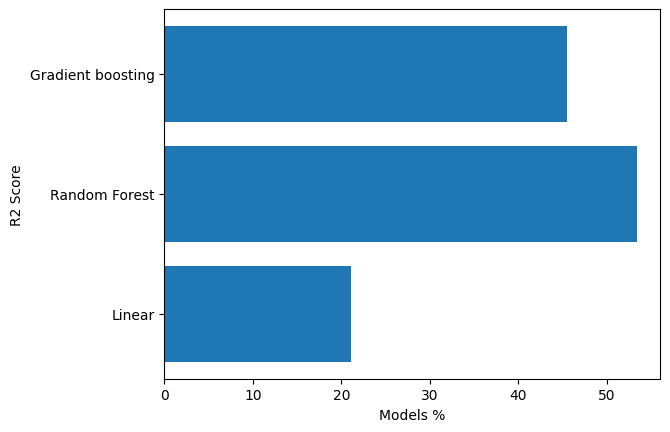

In [219]:
plt.barh(['Linear','Random Forest','Gradient boosting'],[r1,r2,r3])
plt.xlabel('Models %')
plt.ylabel('R2 Score')
#plt.scatter(y, y_predict, color = 'red', label='Scatter Plot')
